# Linear Regression

선형 회귀(Regression)은 주어진 데이터를 가장 잘 나타내는 선형방정식을 나타내기 위하여 사용한다.

$y = 2x + 3$ 라는 함수에 노이즈를 추가하여 $(x_i, y_i)$ 좌표를 15개를 만들어보자.

위의 데이터를 가장 잘 표현하는 함수는 당연히 $y = 2x + 3$ 이다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
x = np.arange(1, 16)
y = 2*x + 3 + np.random.randn(15)*2

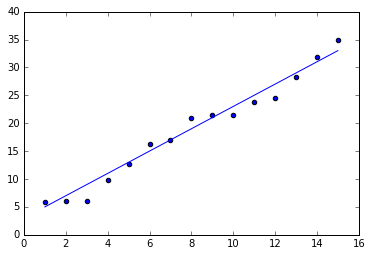

In [42]:
plt.scatter(x,y)
plt.plot(x, 2*x +3 )

하지만 어떻게 노이즈가 낀 데이터를 이용하여 가장 이 데이터를 가장 잘 표현하는 선형방정식을 찾을 수 있을까?

## Squared Error

위에서 사용된 $y = 2x + 3$ 함수를

$y = w_1x^1 + w_0x^0$라는 방정식으로 표현해보자. 이 때 $x^0=1$이다.

그러면 우리는 $w$를 column vector로 표현할 수 있다.

$ w = \begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix}$

그리고 Error $E(w) = \sum^n_{i=1}(y_i - w^Tx_i)^2$라고 정의한다.

통계학을 공부해본 사람이라면 이 에러가 분산과 매우 비슷하게 정의됨을 확인할 수 있다.

그렇다면 Error $E(w)$를 최소화시키는 값인 $w$값을 구하면 이 값으로 이 데이터를 가장 잘 표현하는 함수를 만들수 있을 것이다.

## Minimize $E(w)$

최소자승법과 정규분포의 발견자인 가우스는 관측의 분포가 정규분포를 따른다고 보았다.

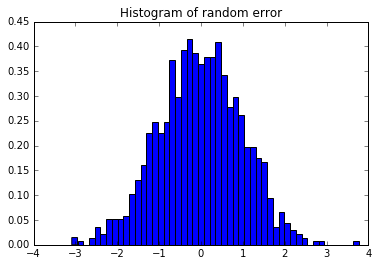

In [14]:
random = np.random.randn(1000)
plt.hist(random, bins=50, normed=True)
plt.title("Histogram of random error")
plt.show()

우리의 관측은 정확하지 않기때문에 항상 오차를 내포하고 있다. 다만 오차가 클수록 그렇게 관측할 확률은 떨어진다.

정규분포에서 분포의 값이 최대화 되는 값, 즉 오차가 가장 적은 $w$값은 정규분포의 상한(Upperbound)일때 값이다.

즉 정규분포함수의 기울기가 0이 되는 값이다.

따라서 $E(w)$를 $w$로 미분할때 0이 되는 값을 구해볼 수 있다.

$\frac {\partial} {\partial w} E(w) = \frac {\partial} {\partial w} \sum_{i=1}^n(y_i - w^Tx_i)^2 = 0$

## Matrix-form


$\sum$을 다른 방식으로 생각해보자.

$Y = [y_1, ... , y_n]^T, X = [x_1, ... x_n]^T$라는 행렬을 만들자

이때 $Y = Xw$

즉
$\begin{bmatrix}y_i\\\vdots \\y_n\end{bmatrix} = 
\begin{bmatrix}x_{01}&\cdots&x_{d1}\\ \vdots&\ddots&\vdots\\ x_{0n}&\cdots&x_{dn}\end{bmatrix}
\begin{bmatrix}w_1 \\ \cdots \\w_d\end{bmatrix}$ 로 표현할 수 있다.

이 때,$x_{ij}$은 데이터셋 X에서 j번째 x의 i번째 성분을 표현한다.

$X$의 크기는 $N \times D$가 되고 $w^T$의 크기는 $D \times 1$이므로 두 행렬곱의 크기인 $N \times 1$이 $Y$의 크기와 일치함을 확인할 수 있다. 

## Moore-Penrose Pseudo Inverse

이 때 에러를 최소화하는 방법은 $E(w) = ||Y - Xw||^2$를 최소화 하는 것이다

이는 $E(w) = (Y - Xw)^T(Y - Xw)$로 표현할 수 있다 위의 식을 풀면 

$E(w) = Y^TY - Y^TXw - w^TX^TY - w^TX^TXw$ 가 된다.

이때 $Y^TXw$ 와 $w^TX^TY$는 각각 행렬의 크기가 

$(1\times N)\times(N\times D)\times(D\times1)$, $(1\times D)\times(D\times N)\times(N\times1)$ 즉 $1\times1$ 스칼라가 된다

따라서 $Y^TXw = w^TX^TY$이고, $E(w) = Y^TY - 2w^TX^TY - w^TX^TXw$이다

이를 $w$로 미분할때 0이 되는 값을 찾자.

$\frac {\partial} {\partial} E(w) = -2X^TY + 2X^TXw = 0$

위식에서 $w$를 구하면

$w = (X^TX)^{-1}X^TY$라고 구할수 있다.

이 때 $(X^TX)^{-1}X^T=X^{†}$라고 정의하고 $X^{†}$를 Moore-Penrose Pseudo inverse matrix라고 한다

아래는 코드 예제이다.

In [80]:
def get_linear(x,y):
    Y = y[:,np.newaxis]
    X = np.concatenate((np.ones(len(x))[:,np.newaxis], x[:,np.newaxis]), axis=1)
    w = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(Y) ## Moore-penrose pseudo inverse matrix multiplies Y
    return w.T[0]

In [83]:
w = get_linear(x,y)
w

array([ 2.30466045,  2.05355685])

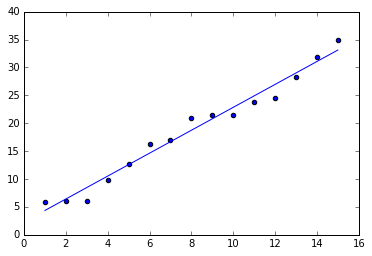

In [82]:
plt.scatter(x, y)
plt.plot(x, w[0] + x * w[1])
plt.show()